# Rushing Data Visualizations

In [1]:
#importing Dependancies
#============================================================================================
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
#loading Rushing data for transformation
#============================================================================================

file_path = Path('cleaned_data/rushing_data.csv')
df = pd.read_csv(file_path)

In [3]:
df.head()

,Unnamed: 0,player,rush_att,rush_yds,rush_td,rush_long,fumbles_lost,rush_scrambles,designed_rush_att,rush_yds_before_contact,rush_broken_tackles
0,0,A.J. Brown,6,79,1,79,0,0,6,18,2
1,1,A.J. McCarron,5,39,1,18,0,5,0,39,0
2,2,AJ Cole III,1,0,0,0,0,0,1,0,0
3,3,AJ Dillon,336,1469,9,441,1,0,336,757,26
4,4,Aaron Jones,771,3847,34,1207,5,0,771,1944,70


In [4]:
#dropping unnecessary columns
#==================================
rushing_data =df.drop(['Unnamed: 0'],axis=1)
rushing_data = rushing_data.drop(columns=['rush_long'])

rushing_data.head()

,player,rush_att,rush_yds,rush_td,fumbles_lost,rush_scrambles,designed_rush_att,rush_yds_before_contact,rush_broken_tackles
0,A.J. Brown,6,79,1,0,0,6,18,2
1,A.J. McCarron,5,39,1,0,5,0,39,0
2,AJ Cole III,1,0,0,0,0,1,0,0
3,AJ Dillon,336,1469,9,1,0,336,757,26
4,Aaron Jones,771,3847,34,5,0,771,1944,70


In [5]:
#Create new column for ypc
rushing_data['ypc'] = rushing_data['rush_yds']/rushing_data['rush_att']

rushing_data = rushing_data.round({'ypc':2})
rushing_data.head()

,player,rush_att,rush_yds,rush_td,fumbles_lost,rush_scrambles,designed_rush_att,rush_yds_before_contact,rush_broken_tackles,ypc
0,A.J. Brown,6,79,1,0,0,6,18,2,13.17
1,A.J. McCarron,5,39,1,0,5,0,39,0,7.80
2,AJ Cole III,1,0,0,0,0,1,0,0,0.00
3,AJ Dillon,336,1469,9,1,0,336,757,26,4.37
4,Aaron Jones,771,3847,34,5,0,771,1944,70,4.99


In [6]:
#Declaring Qualified runners as any running back with over 150 designed rush attempts in data set
#===========================================================================================
qualified_rushers = rushing_data.loc[rushing_data['designed_rush_att']>150]
qualified_rushers

,player,rush_att,rush_yds,rush_td,fumbles_lost,rush_scrambles,designed_rush_att,rush_yds_before_contact,rush_broken_tackles,ypc
3,AJ Dillon,336,1469,9,1,0,336,757,26,4.37
4,Aaron Jones,771,3847,34,5,0,771,1944,70,4.99
10,Adrian Peterson,405,1600,14,2,0,405,759,19,3.95
18,Alexander Mattison,371,1547,8,2,0,371,790,41,4.17
23,Alvin Kamara,741,3244,28,3,0,741,1805,79,4.38
...,...,...,...,...,...,...,...,...,...,...
577,Todd Gurley,418,1535,21,2,0,418,812,40,3.67
584,Tony Pollard,402,2129,13,1,0,402,954,31,5.30
608,Ty Johnson,181,774,3,2,0,181,451,9,4.28
628,Wayne Gallman,204,896,8,1,0,204,461,12,4.39


In [7]:
#Finding top rushers by rushing yards
#=========================================
top_yards = qualified_rushers.nlargest(n=10, columns=['rush_yds'])
top_yards

,player,rush_att,rush_yds,rush_td,fumbles_lost,rush_scrambles,designed_rush_att,rush_yds_before_contact,rush_broken_tackles,ypc
193,Derrick Henry,1187,5810,53,5,0,1187,2575,104,4.89
474,Nick Chubb,896,4806,38,5,0,896,2242,97,5.36
144,Dalvin Cook,962,4524,42,8,0,962,2382,80,4.70
4,Aaron Jones,771,3847,34,5,0,771,1944,70,4.99
400,Lamar Jackson,588,3844,19,11,169,419,2822,33,6.54
228,Ezekiel Elliott,903,3812,32,8,0,903,2002,53,4.22
347,Josh Jacobs,839,3717,34,4,0,839,1674,77,4.43
332,Jonathan Taylor,692,3520,31,5,0,692,1863,52,5.09
318,Joe Mixon,885,3464,24,2,0,885,1846,58,3.91
23,Alvin Kamara,741,3244,28,3,0,741,1805,79,4.38


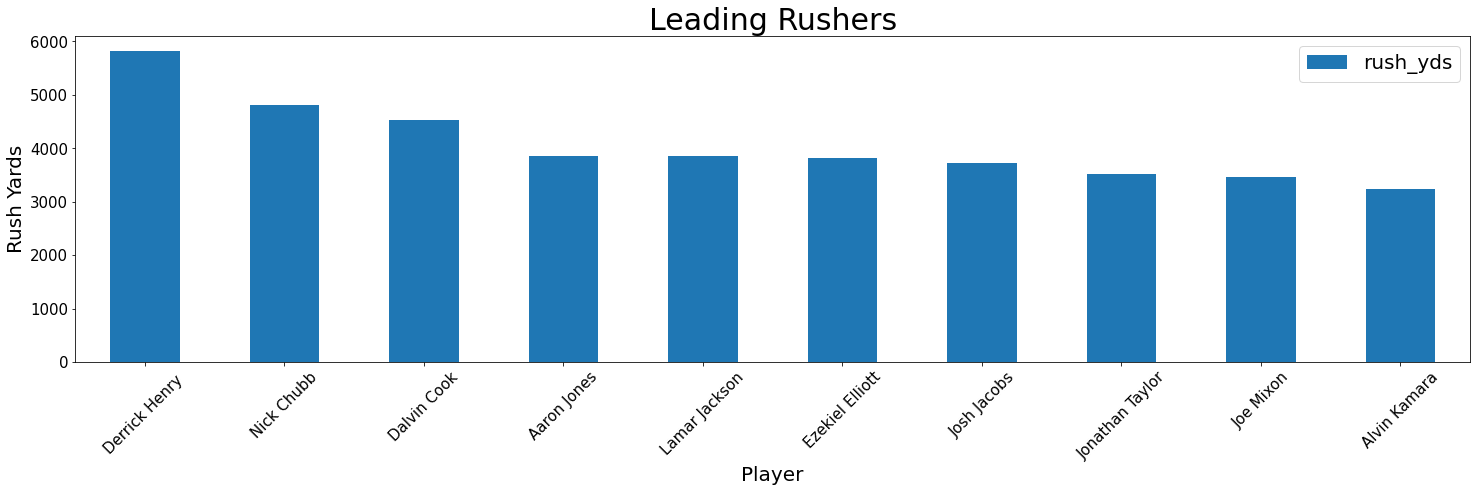

In [8]:
top_yards.plot(x="player",
               y="rush_yds", 
               kind="bar",
               figsize= (25,6),
              title = "Leading Rushers",
              legend = True,
              fontsize = 15)

plt.xticks(rotation=45)
plt.title("Leading Rushers",fontsize = 30)
plt.savefig('Images/Rushing Graphs/Leading Rushers.pdf',dpi = 500,bbox_inches='tight')
plt.xlabel('Player', fontsize=20)
plt.ylabel('Rush Yards', fontsize=20)
plt.legend(prop={'size': 20})
plt.show()

In [9]:
#Finding top rushers by rushing touchdowns
#=========================================
top_touchdowns = qualified_rushers.nlargest(n=10, columns=['rush_td'])
top_touchdowns

,player,rush_att,rush_yds,rush_td,fumbles_lost,rush_scrambles,designed_rush_att,rush_yds_before_contact,rush_broken_tackles,ypc
193,Derrick Henry,1187,5810,53,5,0,1187,2575,104,4.89
144,Dalvin Cook,962,4524,42,8,0,962,2382,80,4.70
474,Nick Chubb,896,4806,38,5,0,896,2242,97,5.36
4,Aaron Jones,771,3847,34,5,0,771,1944,70,4.99
347,Josh Jacobs,839,3717,34,4,0,839,1674,77,4.43
228,Ezekiel Elliott,903,3812,32,8,0,903,2002,53,4.22
332,Jonathan Taylor,692,3520,31,5,0,692,1863,52,5.09
23,Alvin Kamara,741,3244,28,3,0,741,1805,79,4.38
283,James Conner,556,2193,28,1,0,556,1069,43,3.94
446,Melvin Gordon,648,2783,27,12,0,648,1434,49,4.29


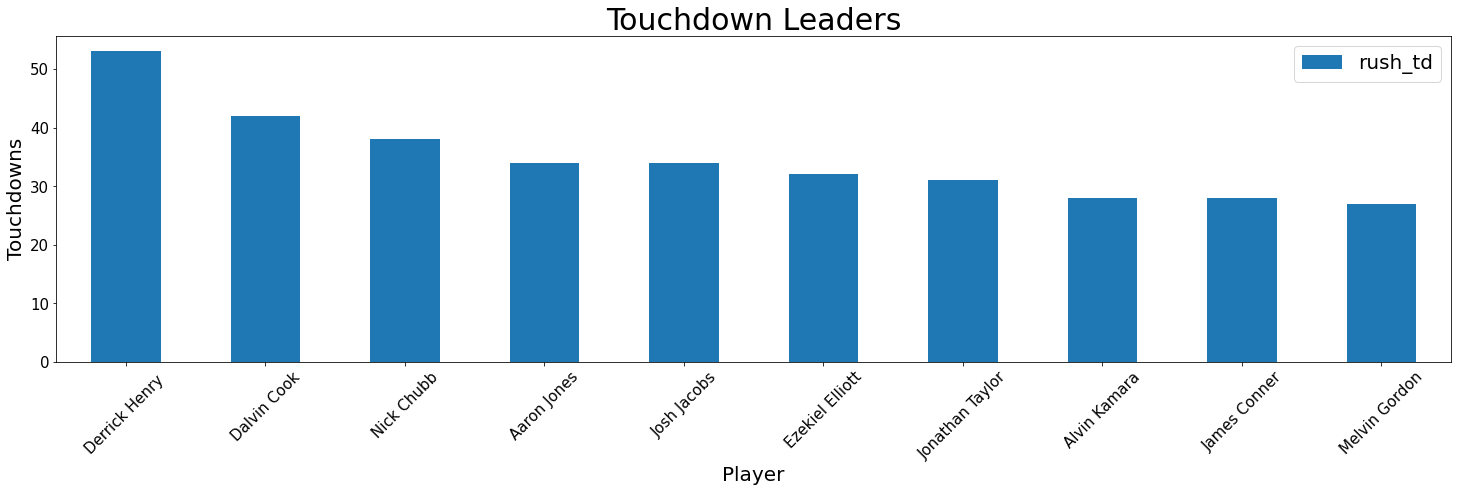

In [10]:
top_touchdowns.plot(x="player",
               y="rush_td", 
               kind="bar",
               figsize= (25,6),
              title = "Touchdown Leaders",
              legend = True,
              fontsize = 15)

plt.xticks(rotation=45)
plt.title("Touchdown Leaders",fontsize = 30)
plt.savefig('Images/Rushing Graphs/Touchdown Leaders.pdf',dpi = 500,bbox_inches='tight')
plt.xlabel('Player', fontsize=20)
plt.ylabel('Touchdowns', fontsize=20)
plt.legend(prop={'size': 20})
plt.show()

In [11]:
#Finding top rushers by yards per carry
#=========================================
top_ypc = qualified_rushers.nlargest(n=10, columns=['ypc'])
top_ypc

,player,rush_att,rush_yds,rush_td,fumbles_lost,rush_scrambles,designed_rush_att,rush_yds_before_contact,rush_broken_tackles,ypc
400,Lamar Jackson,588,3844,19,11,169,419,2822,33,6.54
568,Taysom Hill,231,1389,19,6,31,200,977,15,6.01
510,Rashaad Penny,252,1499,11,1,0,252,751,17,5.95
397,Kyler Murray,367,2091,22,7,131,236,1789,11,5.70
344,Josh Allen,437,2371,26,16,162,275,1476,24,5.43
264,J.K. Dobbins,188,1013,11,0,0,188,529,12,5.39
474,Nick Chubb,896,4806,38,5,0,896,2242,97,5.36
508,Raheem Mostert,385,2043,15,3,0,385,1246,29,5.31
584,Tony Pollard,402,2129,13,1,0,402,954,31,5.30
362,Justin Jackson,164,853,2,1,0,164,539,7,5.20


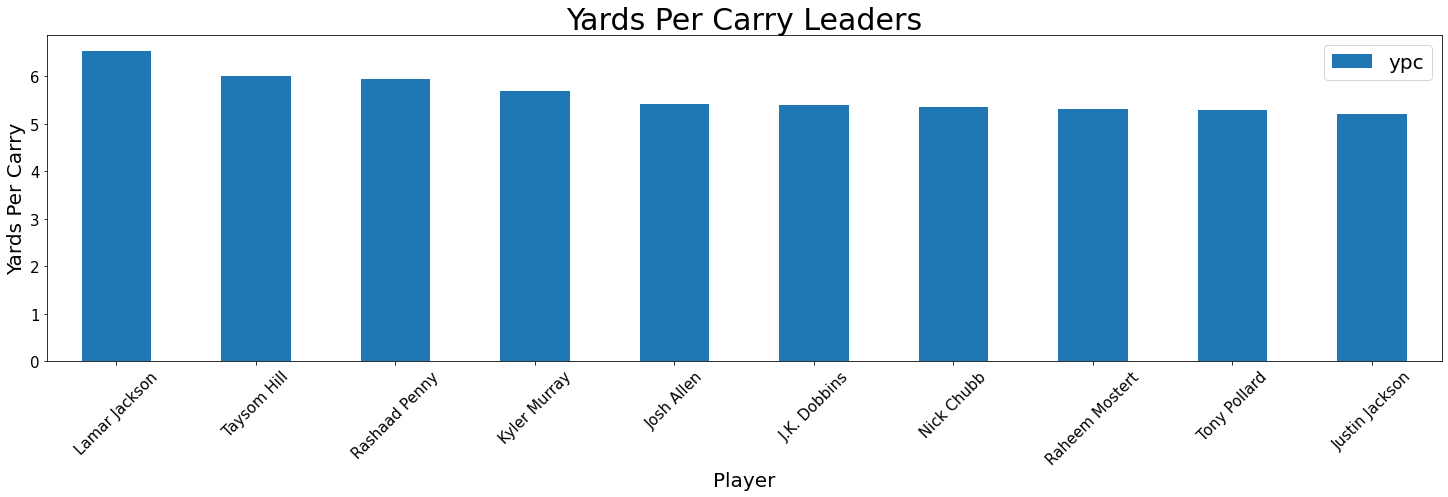

In [12]:
top_ypc.plot(x="player",
               y="ypc", 
               kind="bar",
               figsize= (25,6),
              title = "Yards Per Carry Leaders",
              legend = True,
              fontsize = 15)

plt.xticks(rotation=45)
plt.title("Yards Per Carry Leaders",fontsize = 30)
plt.savefig('Images/Rushing Graphs/Yards Per Carry Leaders.pdf',dpi = 500,bbox_inches='tight')
plt.xlabel('Player', fontsize=20)
plt.ylabel('Yards Per Carry', fontsize=20)
plt.legend(prop={'size': 20})
plt.show()

In [13]:
top_fumblers = qualified_rushers.nlargest(n=10, columns=['fumbles_lost'])
top_fumblers

,player,rush_att,rush_yds,rush_td,fumbles_lost,rush_scrambles,designed_rush_att,rush_yds_before_contact,rush_broken_tackles,ypc
344,Josh Allen,437,2371,26,16,162,275,1476,24,5.43
446,Melvin Gordon,648,2783,27,12,0,648,1434,49,4.29
400,Lamar Jackson,588,3844,19,11,169,419,2822,33,6.54
144,Dalvin Cook,962,4524,42,8,0,962,2382,80,4.70
228,Ezekiel Elliott,903,3812,32,8,0,903,2002,53,4.22
397,Kyler Murray,367,2091,22,7,131,236,1789,11,5.70
43,Antonio Gibson,491,2044,20,6,0,491,1123,39,4.16
525,Ronald Jones II,500,2269,17,6,0,500,1024,40,4.54
568,Taysom Hill,231,1389,19,6,31,200,977,15,6.01
4,Aaron Jones,771,3847,34,5,0,771,1944,70,4.99


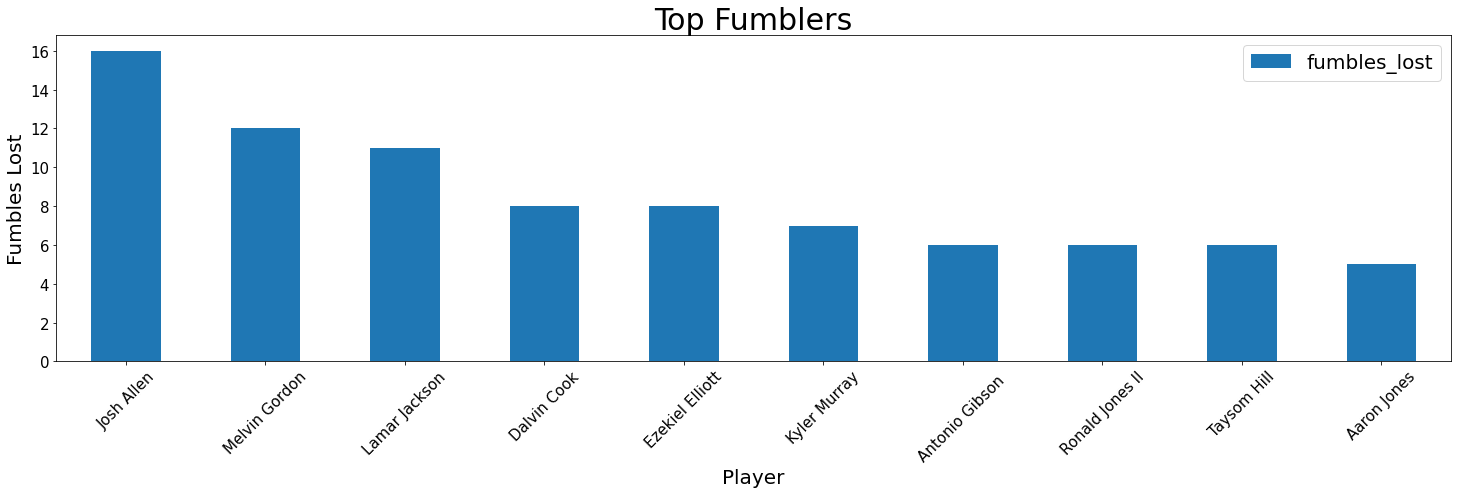

In [14]:
top_fumblers.plot(x="player",
               y="fumbles_lost", 
               kind="bar",
               figsize= (25,6),
              title = "Fumble Leaders",
              legend = True,
              fontsize = 15)

plt.xticks(rotation=45)
plt.title("Top Fumblers",fontsize = 30)
plt.savefig('Images/Rushing Graphs/Top Fumblers.pdf',dpi = 500,bbox_inches='tight')
plt.xlabel('Player', fontsize=20)
plt.ylabel('Fumbles Lost', fontsize=20)
plt.legend(prop={'size': 20})
plt.show()